In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

In [2]:
startUps = pd.read_csv('big_startup_secsees_dataset.csv')

In [3]:
startUps = startUps.drop(['name','homepage_url'],axis=1)

In [4]:
startUps.info()
startUps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   category_list      63220 non-null  object
 2   funding_total_usd  66368 non-null  object
 3   status             66368 non-null  object
 4   country_code       59410 non-null  object
 5   state_code         57821 non-null  object
 6   region             58338 non-null  object
 7   city               58340 non-null  object
 8   funding_rounds     66368 non-null  int64 
 9   founded_at         51147 non-null  object
 10  first_funding_at   66344 non-null  object
 11  last_funding_at    66368 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.1+ MB


,permalink,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [5]:
startUps[['category_list','status','country_code','founded_at','first_funding_at','last_funding_at']] = startUps[['category_list','status','country_code','founded_at','first_funding_at','last_funding_at']].astype('string')

In [6]:
def make_float(num):
    if num == '-':
        num = 0
    return float(num)

startUps['funding_total_usd'] = startUps['funding_total_usd'].apply(make_float)

In [7]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   category_list      63220 non-null  string 
 2   funding_total_usd  66368 non-null  float64
 3   status             66368 non-null  string 
 4   country_code       59410 non-null  string 
 5   state_code         57821 non-null  object 
 6   region             58338 non-null  object 
 7   city               58340 non-null  object 
 8   funding_rounds     66368 non-null  int64  
 9   founded_at         51147 non-null  string 
 10  first_funding_at   66344 non-null  string 
 11  last_funding_at    66368 non-null  string 
dtypes: float64(1), int64(1), object(4), string(6)
memory usage: 6.1+ MB


In [8]:
startUps = startUps.drop(['region','city'],axis=1)

<AxesSubplot:>

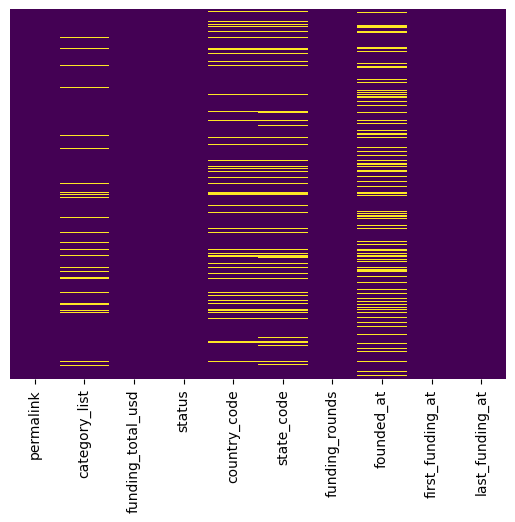

In [9]:
sns.heatmap(startUps.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
startUps['founded_at'] = startUps['founded_at'].fillna(startUps['first_funding_at'])

<AxesSubplot:>

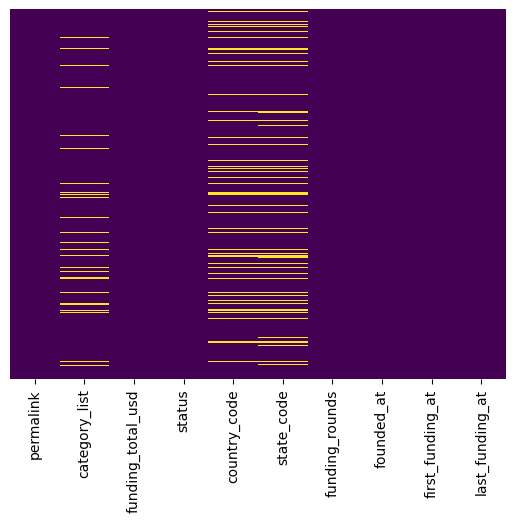

In [11]:
sns.heatmap(startUps.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
startUps.isna().any(axis=1).sum()

10122

In [13]:
startUps = startUps[(startUps['country_code'].notna()) & (startUps['category_list'].notna())]

<AxesSubplot:>

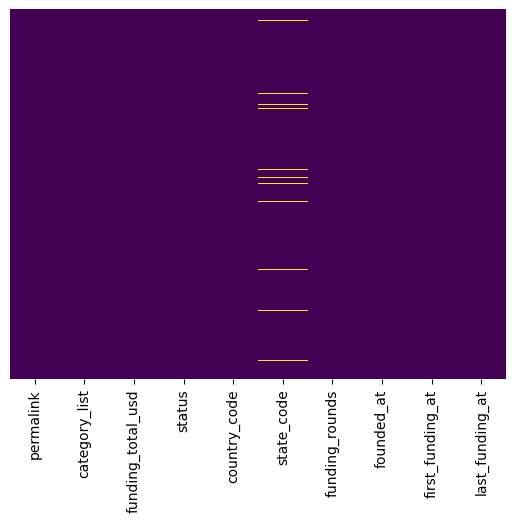

In [14]:
sns.heatmap(startUps.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
startUps = startUps[startUps.country_code != 'operating']

In [16]:
startUpsPerCountry = pd.DataFrame(startUps['country_code'].value_counts()).reset_index()
startUpsPerCountry.rename(columns={"index": "country_code", "country_code": "count"}, inplace=True)
startUpsPerCountry

,country_code,count
0,USA,36655
1,GBR,3599
2,CAN,1875
3,IND,1552
4,CHN,1502
...,...,...
132,SOM,1
133,SYC,1
134,OMN,1
135,HND,1


In [17]:
country_density = dict(
                    type = 'choropleth',
                    locations = startUpsPerCountry['country_code'],
                    locationmode = 'ISO-3',
                    z = startUpsPerCountry['count'],
                    colorbar = {'title':'Count'}
)
layout = dict(
    title = 'StartUps per Country',
    geo = dict(
        showframe = False, projection = {'type':'mercator'}
    )
)
choromap = go.Figure(data = [country_density],layout = layout)
iplot(choromap,validate=False)

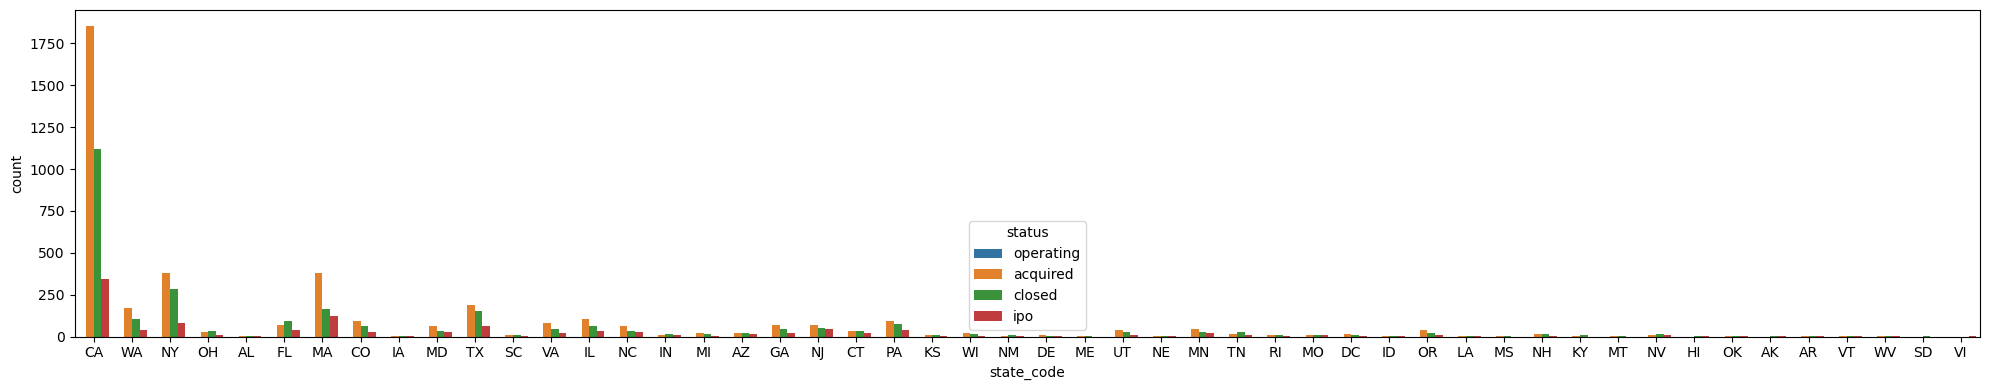

In [18]:
plt.figure(figsize=(20,4))
sns.countplot(x= startUps[(startUps['country_code'] == 'USA') & (startUps['status']!='operating')]['state_code'], hue = startUps['status'])
plt.tight_layout()

In [19]:
startUps = startUps.drop(['permalink','state_code'],axis=1)

In [20]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57804 entries, 0 to 66366
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_list      57804 non-null  string 
 1   funding_total_usd  57804 non-null  float64
 2   status             57804 non-null  string 
 3   country_code       57804 non-null  string 
 4   funding_rounds     57804 non-null  int64  
 5   founded_at         57801 non-null  string 
 6   first_funding_at   57782 non-null  string 
 7   last_funding_at    57804 non-null  string 
dtypes: float64(1), int64(1), string(6)
memory usage: 4.0 MB


In [21]:
startUps[startUps['country_code'].map(len) != 3]
startUps.dropna(inplace=True)

In [22]:
startUps['founded_at'] = startUps['founded_at'].apply(lambda row: int(row.split('-')[0]))
startUps['first_funding_at'] = startUps['first_funding_at'].apply(lambda row: int(row.split('-')[0]))
startUps['last_funding_at'] = startUps['last_funding_at'].apply(lambda row: int(row.split('-')[0]))

In [23]:
startUps['last_funding_at'].unique()

array([2015, 2014, 2008, 2009, 2013, 2010, 2011, 2006, 2012, 2007, 2002,
       2004, 2003, 2005, 1998, 2001, 1979, 1994, 2000, 1990, 1999, 1985,
       1995, 1996, 1977, 1973, 1986, 1987, 1997, 1992, 1989, 1991, 1993,
       1982, 1984, 1988, 2105], dtype=int64)

In [24]:
startUps['first_funding_at'].unique()

array([2015, 2014, 2008, 2009, 2013, 2011, 2010, 2012, 2006, 2007, 2002,
       2004, 2005, 2003, 1999, 1998, 2001, 2000, 1979, 1996, 1994, 1990,
       1995, 1985, 1977, 1997, 1532, 1973, 1986, 1987, 1993, 1992, 1201,
       1989, 1991, 1982, 1984, 1014, 1988, 1960], dtype=int64)

In [25]:
startUps = startUps[(startUps.first_funding_at != 1201) & (startUps.first_funding_at != 1014) & (startUps.first_funding_at != 1532) & (startUps.last_funding_at != 2105)]

In [26]:
startUps['first_funding_at'].unique()
startUps['last_funding_at'].unique()

array([2015, 2014, 2008, 2009, 2013, 2010, 2011, 2006, 2012, 2007, 2002,
       2004, 2003, 2005, 1998, 2001, 1979, 1994, 2000, 1990, 1999, 1985,
       1995, 1996, 1977, 1973, 1986, 1987, 1997, 1992, 1989, 1991, 1993,
       1982, 1984, 1988], dtype=int64)

In [27]:
startUps['years_of_funding'] = startUps['last_funding_at'] - startUps['first_funding_at'] + 1

In [28]:
startUps.drop(['first_funding_at','last_funding_at'],axis=1,inplace=True)

In [29]:
startUps

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,years_of_funding
0,Media,10000000.0,operating,IND,1,2015,1
1,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014,1
3,Curated Web,2000000.0,operating,CHN,1,2007,1
4,Software,0.0,operating,USA,1,2010,1
5,Games,41250.0,operating,HKG,1,2014,1
...,...,...,...,...,...,...,...
66361,Biotechnology,2686600.0,operating,AUT,1,2007,1
66362,Analytics|Android|Developer APIs|Education|Gam...,1120000.0,operating,GBR,3,2014,2
66363,Enterprise Software,1587301.0,operating,CHN,1,2012,1
66364,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,4,2012,4


In [30]:
categories = pd.DataFrame(startUps.groupby('category_list')['status'].count().sort_values(ascending=False))
topCategories = categories[categories['status'] > 50].index.tolist()
topCategories

['Software',
 'Biotechnology',
 'E-Commerce',
 'Clean Technology',
 'Mobile',
 'Curated Web',
 'Hardware + Software',
 'Health Care',
 'Enterprise Software',
 'Games',
 'Health and Wellness',
 'Manufacturing',
 'Advertising',
 'Education',
 'Semiconductors',
 'Finance',
 'Consulting',
 'Real Estate',
 'Security',
 'Hospitality',
 'Social Media',
 'Web Hosting',
 'Analytics',
 'Fashion',
 'Technology',
 'Medical',
 'Biotechnology|Health Diagnostics',
 'Travel',
 'Internet',
 'News',
 'Sports',
 'Messaging',
 'Music',
 'Medical Devices',
 'EdTech|Education',
 'Pharmaceuticals',
 'Public Relations',
 'Information Technology',
 'Entertainment|Games',
 'Financial Services',
 'Apps',
 'Finance|FinTech',
 'Automotive',
 'Transportation',
 'Search',
 'Biotechnology|Health Care',
 'Photography',
 'Nanotechnology',
 'Services',
 'Nonprofits',
 'Public Transportation',
 'Consumer Electronics',
 'Design',
 'Telecommunications',
 'Food Processing',
 'Entertainment',
 'Finance|Venture Capital',
 'Me

In [31]:
def get_category(categories):
    if '|' not in categories:
        return categories
    else:
        return categories.split('|')[0]

singleCategories = set(get_category(i) for i in topCategories)

In [32]:
def make_single_category(categories):
    if categories not in singleCategories:
        if '|' not in categories:
            return 'Other'
        else:
            splitUpCats = categories.split('|')
            for i in splitUpCats:
                if i in singleCategories:
                    return i
            return None
    else:
        return categories

startUps['category_list'] = startUps['category_list'].apply(make_single_category)

In [33]:
pd.DataFrame(startUps.groupby('category_list')['status'].count().sort_values(ascending=False))

,status
category_list,
Software,5361
Biotechnology,4386
E-Commerce,3249
Mobile,2613
Curated Web,2596
Other,2385
Advertising,2315
Enterprise Software,2198
Analytics,1592


In [34]:
def success_and_fail(status):
    if status == 'operating':
        return status
    elif status == 'closed':
        return 0
    else:
        return 1
    
startUps['status'] = startUps['status'].apply(success_and_fail)

In [35]:
startUps['founded_at'] = startUps['founded_at'].apply(lambda year: (year - startUps['founded_at'].min())/(startUps['founded_at'].max() - startUps['founded_at'].min()))
startUps['funding_total_usd'] = startUps['funding_total_usd'].apply(lambda funds: (funds - startUps['funding_total_usd'].min())/(startUps['funding_total_usd'].max() - startUps['funding_total_usd'].min()))
startUps['years_of_funding'] = startUps['years_of_funding'].apply(lambda funds: (funds - startUps['years_of_funding'].min())/(startUps['years_of_funding'].max() - startUps['years_of_funding'].min()))
startUps['funding_rounds'] = startUps['funding_rounds'].apply(lambda funds: (funds - startUps['funding_rounds'].min())/(startUps['funding_rounds'].max() - startUps['funding_rounds'].min()))

In [36]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57778 entries, 0 to 66366
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_list      55174 non-null  object 
 1   funding_total_usd  57778 non-null  float64
 2   status             57778 non-null  object 
 3   country_code       57778 non-null  string 
 4   funding_rounds     57778 non-null  float64
 5   founded_at         57778 non-null  float64
 6   years_of_funding   57778 non-null  float64
dtypes: float64(4), object(2), string(1)
memory usage: 3.5+ MB


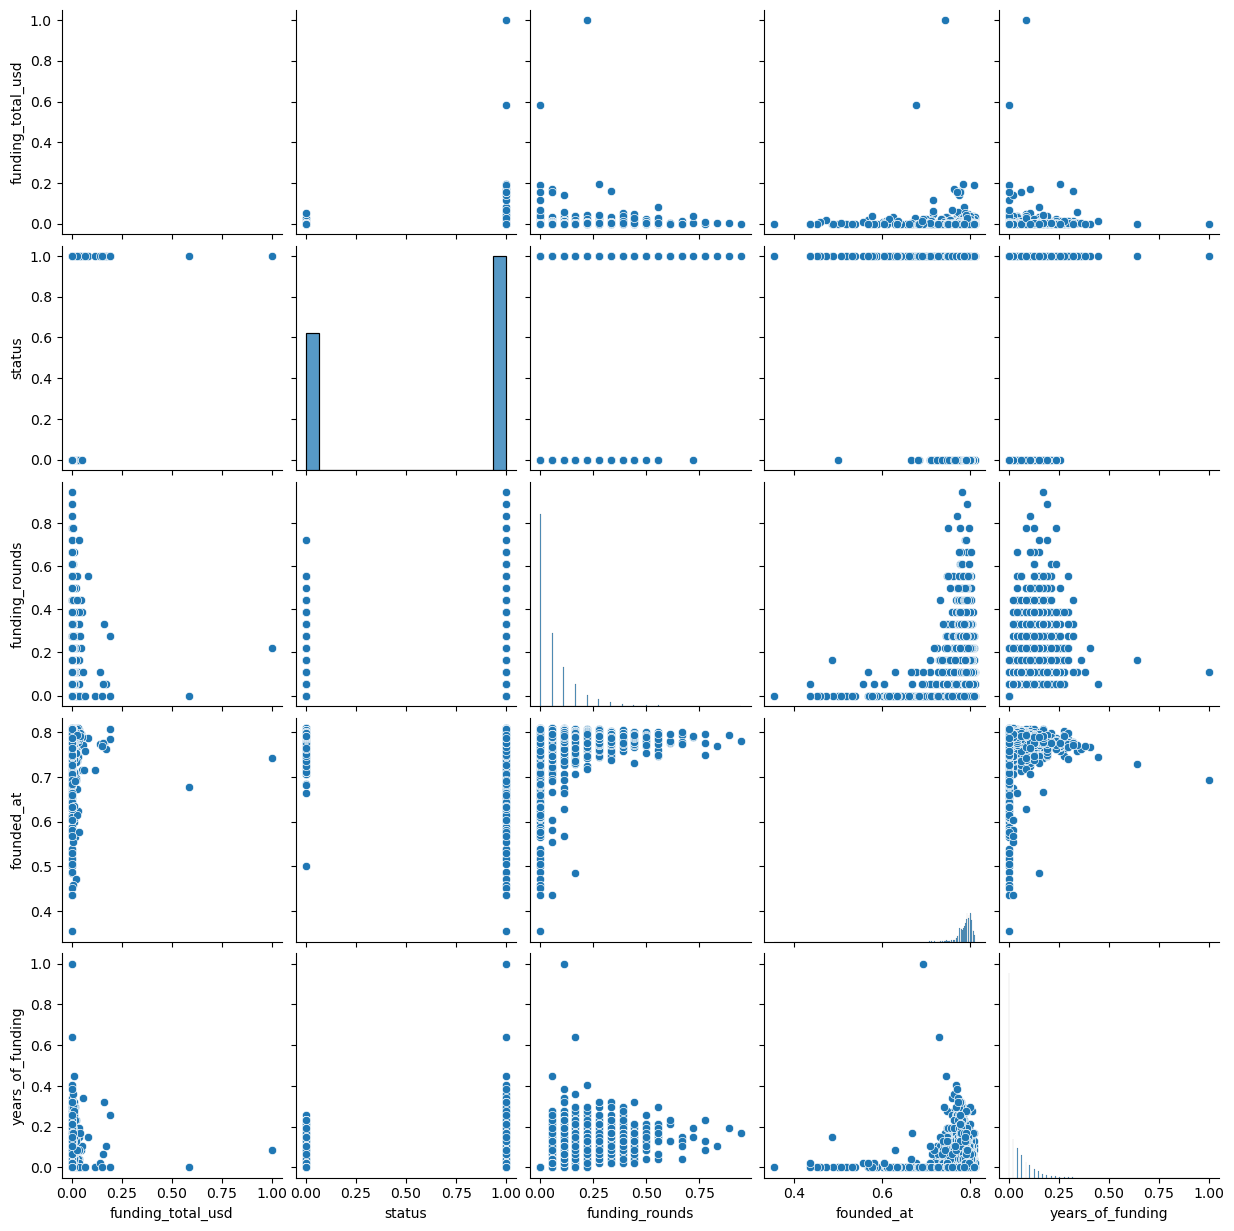

In [37]:
sns.pairplot(startUps[startUps['status'] != 'operating'])

In [38]:
startUps = pd.get_dummies(data=startUps,columns=['category_list','country_code'],prefix=['category','country'],drop_first=True)

In [39]:
startUpsDevData = startUps[startUps['status'] != 'operating']

In [40]:
startUpsDevData.select_dtypes(include='object')

,status
15,1
20,1
23,1
31,1
32,1
...,...
66349,1
66350,1
66352,1
66358,0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(startUpsDevData.drop('status',axis=1), 
                                                    startUpsDevData['status'], test_size=0.30, 
                                                    random_state=101)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [43]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [44]:
log_predictions = logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1305
           1       0.70      0.85      0.77      1980

    accuracy                           0.69      3285
   macro avg       0.68      0.64      0.65      3285
weighted avg       0.68      0.69      0.67      3285



In [47]:
from sklearn.naive_bayes import MultinomialNB

NBModel = MultinomialNB()
NBModel.fit(X_train, y_train)

NB_predictions = NBModel.predict(X_test)

print(classification_report(y_test,NB_predictions))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44      1305
           1       0.67      0.86      0.75      1980

    accuracy                           0.65      3285
   macro avg       0.64      0.60      0.60      3285
weighted avg       0.65      0.65      0.63      3285



In [48]:
from sklearn.svm import LinearSVC

SVMModel = LinearSVC(C = 1)
SVMModel.fit(X_train,y_train)

SVM_predictions = SVMModel.predict(X_test)

print(classification_report(y_test,SVM_predictions))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55      1305
           1       0.71      0.84      0.77      1980

    accuracy                           0.69      3285
   macro avg       0.68      0.66      0.66      3285
weighted avg       0.69      0.69      0.68      3285



In [49]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_estimators = 50, max_depth = 10)
RFModel.fit(X_train,y_train)

RF_predictions = RFModel.predict(X_test)

print(classification_report(y_test,RF_predictions))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59      1305
           1       0.73      0.84      0.78      1980

    accuracy                           0.71      3285
   macro avg       0.70      0.68      0.68      3285
weighted avg       0.71      0.71      0.70      3285

